# Lending Tree Loan Portfolio

![](banner_lending_tree.jpg)

Exploratory Data Analysis (EDA), Kernel Density Estimation (KDE), Principal Component Analysis (PCA), Classification

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)                                                     
update_geom_defaults("point", list(size=0.01, colour=PALETTE[1]))
update_geom_defaults("vline", list(color="black", size=0.15))

.................................................... start of document ....................................................

## Situation

LendingTree is an online lending exchange that connects consumers with multiple lenders, banks, and credit partners who compete for business.  Since being founded in 1998 LendingTree has facilitated more than 32 million loan requests.

* **Role:** Banker. 
* **Business Decision:** Take on a new portfolio of loans?
* **Approach:** Use kernel density estimation and principal component analysis to look for features that distinguish known good vs. bad loans, and use that insight to inform decisions about taking on on new portfolio of loans.  
* **Dataset:** Lending Tree Loans 2007-2010

## Decision Model

### Influence Diagram

<img src="business-model_lending_tree.jpg" align=left width=600 />

## Data 

In [2]:
datax = read.csv("Lending Tree Loans.csv") # may take about 2 minutes
size(datax)
fmt(datax[1:3,], "First few observations ...", position="left")

observations,variables
887379,74


id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,,10+ years,RENT,24000,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,1,NA,NA,3,0,13648,83.7,9,f,0,0,5861.071,5831.78,5000.00,861.07,0,0.00,0.00,Jan-2015,171.62,,Jan-2016,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-1999,5,NA,NA,3,0,1687,9.4,4,f,0,0,1008.710,1008.71,456.46,435.17,0,117.08,1.11,Apr-2013,119.66,,Sep-2013,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,,10+ years,RENT,12252,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,2,NA,NA,2,0,2956,98.5,10,f,0,0,3003.654,3003.65,2400.00,603.65,0,0.00,0.00,Jun-2014,649.91,,Jan-2016,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Prepare Data

### Focus Analysis on Data Subset

Note which loans are inactive.  Note which inactive loans were not paid back.

In [3]:
fmt(unique(datax$loan_status), "all labels")

all labels
Fully Paid
Charged Off
Current
Default
Late (31-120 days)
In Grace Period
Late (16-30 days)
Does not meet the credit policy. Status:Fully Paid
Does not meet the credit policy. Status:Charged Off
Issued


In [4]:
good_labels = c("Fully Paid", "Does not meet the credit policy. Status:Fully Paid")
bad_labels  = c("Default", "Charged Off", "Does not meet the credit policy. Status:Charged Off")

layout(fmt(good_labels), fmt(bad_labels))

good_labels
Fully Paid
Does not meet the credit policy. Status:Fully Paid
bad_labels
Default
Charged Off
Does not meet the credit policy. Status:Charged Off


In [5]:
inactive.good = which(datax$loan_status %in% good_labels)
inactive.bad = which(datax$loan_status %in% bad_labels)
inactive = c(inactive.good, inactive.bad)
fmt(data.frame(inactive.good=length(inactive.good), inactive.bad=length(inactive.bad), inactive=length(inactive)), "observation count")

inactive.good,inactive.bad,inactive
209711,47228,256939


### Focus Analysis on Convenient Variables

Which variables are not IDs?

In [6]:
m = which(!(colnames(datax) %in% c("id","member_id")))
m

[1]  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
[26] 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
[51] 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74

Which variables are numeric?

In [7]:
n = which(var_info.type(datax[inactive,]) %in% c("integer","numeric"))                  
n

[1]  1  2  3  4  5  7  8 14 25 26 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43
[26] 44 45 47 50 51 52 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
[51] 74

Which variables are complete (no missing data)?

In [8]:
f = which(var_info.na_count(datax[inactive,], labels=FALSE) == 0)
f

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 27
[26] 33 36 37 38 39 40 41 42 43 44 45 46 47 48 49 52 53 56

Which variables have at least some variation (distribution of more than one value)?

In [9]:
v = which(var_info.unique(datax[inactive,], labels=FALSE) > 1)
v

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74

These are the convenient variables:

In [10]:
convenient_variables = intersect(intersect(m, n), intersect(f, v))
convenient_variables

[1]  3  4  5  7  8 25 33 37 38 39 40 41 42 43 44 45 47

### Prepared Data

In [11]:
data  = datax[inactive, convenient_variables]
class = c(rep("good", length(inactive.good)), rep("bad", length(inactive.bad)))

size(data)
fmt(head(data[class=="good",]), "First few good loan observations ...", position="left")
fmt(head(data[class=="bad",]),  "First few bad loan observations ...",  position="left")

observations,variables
256939,17


loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
5000,5000,4975,10.65,162.87,27.65,13648,0,0,5861.071,5831.78,5000,861.07,0.00,0,0,171.62
2400,2400,2400,15.96,84.33,8.72,2956,0,0,3003.654,3003.65,2400,603.65,0.00,0,0,649.91
10000,10000,10000,13.49,339.31,20.00,5598,0,0,12226.302,12226.30,10000,2209.33,16.97,0,0,357.48
5000,5000,5000,7.90,156.46,11.20,7963,0,0,5631.378,5631.38,5000,631.38,0.00,0,0,161.03
3000,3000,3000,18.64,109.43,5.35,8221,0,0,3938.144,3938.14,3000,938.14,0.00,0,0,111.34
6500,6500,6500,14.65,153.45,16.12,4032,0,0,7677.520,7677.52,6500,1177.52,0.00,0,0,1655.54


loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
2500,2500,2500,15.27,59.83,1.00,1687,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.1100,119.66
5600,5600,5600,21.28,152.39,5.55,5210,0,0,646.02,646.02,162.02,294.94,0,189.06,2.0900,152.39
5375,5375,5350,12.69,121.45,18.08,9279,0,0,1476.19,1469.34,673.48,533.42,0,269.29,2.5200,121.45
9000,9000,9000,13.49,305.38,10.08,10452,0,0,2270.70,2270.70,1256.14,570.26,0,444.30,4.1600,305.38
10000,10000,10000,10.65,325.74,7.06,11997,0,0,7471.99,7471.99,5433.47,1393.42,0,645.10,6.3145,325.74
21000,21000,21000,12.42,701.73,13.22,32135,0,0,14025.40,14025.40,10694.96,3330.44,0,0.00,0.0000,701.73


## Explore Data

### Scree Plot of Variables

In [12]:
variable = names(data)
sdev = var_info.sd(data, labels=FALSE)
variance = var_info.var(data, labels=FALSE)
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
loan_amnt,8128.811481,66077576.08731,66077576,0.07372040774082,0.07372041
funded_amnt,8106.456843,65714642.55324,131792219,0.07331549567082,0.14703590
funded_amnt_inv,8141.904114,66290602.60264,198082821,0.07395807386751,0.22099398
int_rate,4.389704,19.26950,198082841,0.00000002149830,0.22099400
installment,244.878760,59965.60734,198142806,0.00006690150101,0.22106090
dti,7.793541,60.73928,198142867,0.00000006776466,0.22106097
revol_bal,19708.797999,388436718.57730,586579585,0.43336506831285,0.65442604
out_prncp,951.034000,904465.66837,587484051,0.00100908026305,0.65543512
out_prncp_inv,950.770737,903964.99381,588388016,0.00100852167820,0.65644364
total_pymnt,9474.816669,89772150.91713,678160167,0.10015560438592,0.75659924


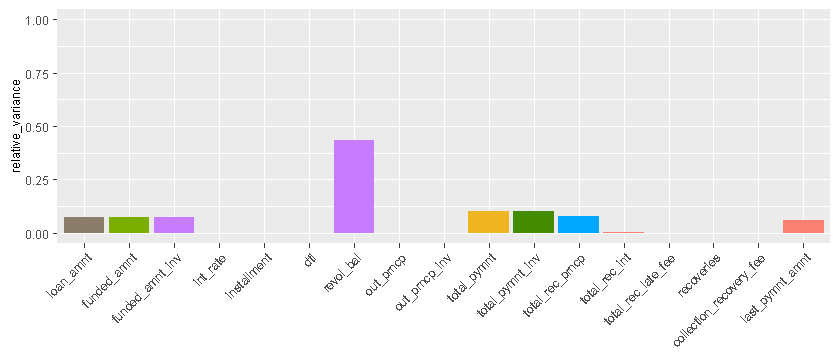

In [13]:
ggplot(scree) + ylim(0,1) +
geom_col(aes(x=factor(variable, levels=variable), y=relative_variance, fill=variable)) +
theme.no_x_axis_title + theme.x_axis_45 + theme.no_legend

### 1D Scatter Plots of 2 Variables

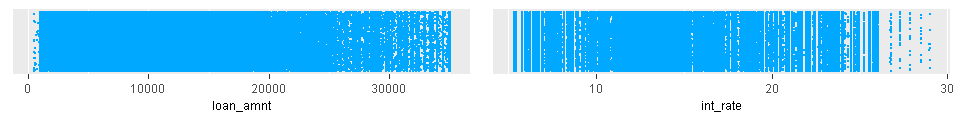

In [14]:
output_size(8,1)
p1 = ggplot(data) + geom_jitter(aes(x=loan_amnt, y=0)) + theme.x_axis_only
p2 = ggplot(data) + geom_jitter(aes(x=int_rate, y=0))  + theme.x_axis_only
grid.arrange(p1, p2, nrow=1)
output_size(restore)

### Probability Density Functions of 2 Variables

Use kernel density estimation to estimate probability densities.

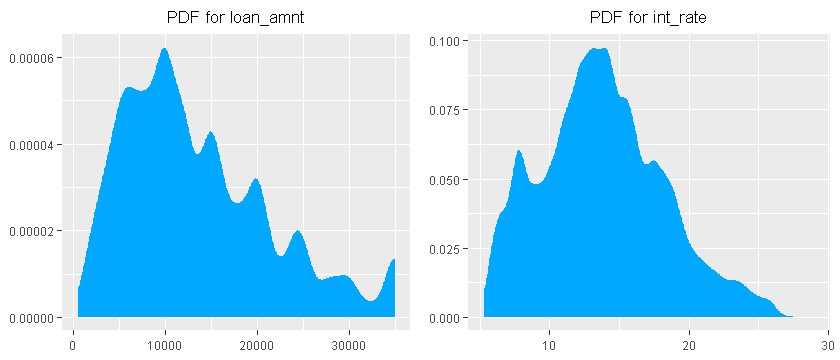

In [15]:
p1 = ggplot(data) + ggtitle("PDF for loan_amnt") +
     geom_density(aes(x=loan_amnt), kernel="gaussian", bw=1000, fill=PALETTE[1]) +
     theme.no_axis_titles

p2 = ggplot(data) + ggtitle("PDF for int_rate") +
     geom_density(aes(x=int_rate), kernel="gaussian", bw=0.5, fill=PALETTE[1]) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

### 2D Scatter Plot of 2 Variables

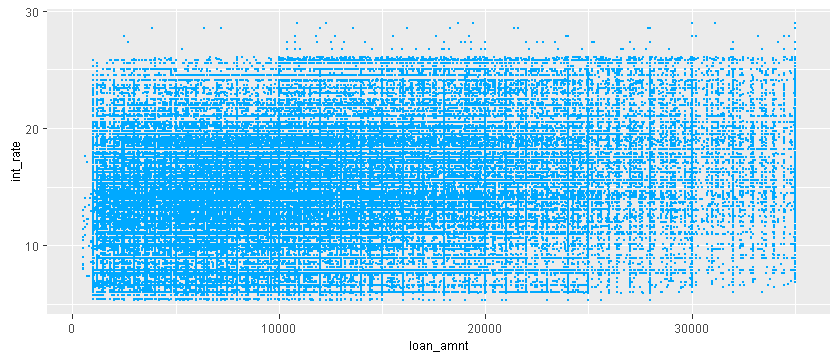

In [16]:
ggplot(data) + geom_point(aes(x=loan_amnt, y=int_rate))

## Try to Distiguish Observations by Loan Class

### Probabilities of Variable Values in Certain Ranges

variable,probability,range_low,range_high
loan_amnt,0.7360615,0,18000
int_rate,0.7026378,10,20


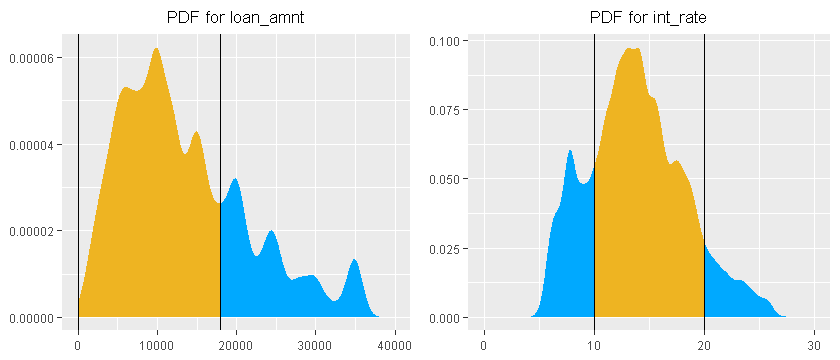

In [17]:
d.loan_amnt = density(data$loan_amnt, kernel="gaussian", bw=1000, from=0, to=40000)
d.int_rate  = density(data$int_rate,  kernel="gaussian", bw=0.5,  from=0, to=30)

pdf.loan_amnt = approxfun(d.loan_amnt)
pdf.int_rate = approxfun(d.int_rate)

data.frame(variable=c("loan_amnt","int_rate"),
           probability=c(integrate(pdf.loan_amnt, 0, 18000)$value, integrate(pdf.int_rate, 10, 20)$value),
           range_low=c(0, 10),
           range_high=c(18000, 20))

p1 = ggplot(data) + xlim(0, 40000) + ggtitle("PDF for loan_amnt") +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, fill=PALETTE[1]) +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, xlim=c(0,18000), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=18000) +
     theme.no_axis_titles

p2 = ggplot(data) + xlim(0, 30) + ggtitle("PDF for int_rate") +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, fill=PALETTE[1]) +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, xlim=c(10,20), fill=PALETTE[5]) +
     geom_vline(xintercept=10) + geom_vline(xintercept=20) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

### Probabilities of Variable Values in Certain Ranges: Good Loans

variable,probability,range_low,range_high
loan_amnt,0.7458814,0,18000
int_rate,0.6938446,10,20


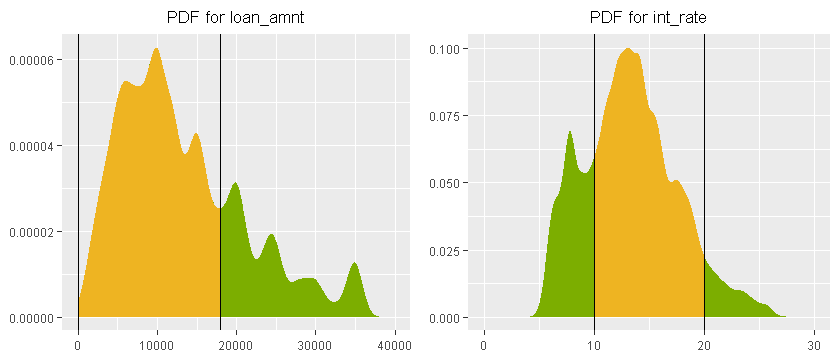

In [18]:
d.loan_amnt = density(data$loan_amnt[class=="good"], kernel="gaussian", bw=1000, from=0, to=40000)
d.int_rate  = density(data$int_rate[class=="good"],  kernel="gaussian", bw=0.5,  from=0, to=30)

pdf.loan_amnt = approxfun(d.loan_amnt)
pdf.int_rate = approxfun(d.int_rate)

data.frame(variable=c("loan_amnt","int_rate"),
           probability=c(integrate(pdf.loan_amnt, 0, 18000)$value, integrate(pdf.int_rate, 10, 20)$value),
           range_low=c(0, 10),
           range_high=c(18000, 20))

p1 = ggplot(data[class=="good",]) + xlim(0, 40000) + ggtitle("PDF for loan_amnt") +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, xlim=c(0,18000), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=18000) +
     theme.no_axis_titles

p2 = ggplot(data[class=="good",]) + xlim(0, 30) + ggtitle("PDF for int_rate") +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, xlim=c(10,20), fill=PALETTE[5]) +
     geom_vline(xintercept=10) + geom_vline(xintercept=20) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

### Probabilities of Variable Values in Certain Ranges: Bad Loans

variable,probability,range_low,range_high
loan_amnt,0.6924573,0,18000
int_rate,0.7416823,10,20


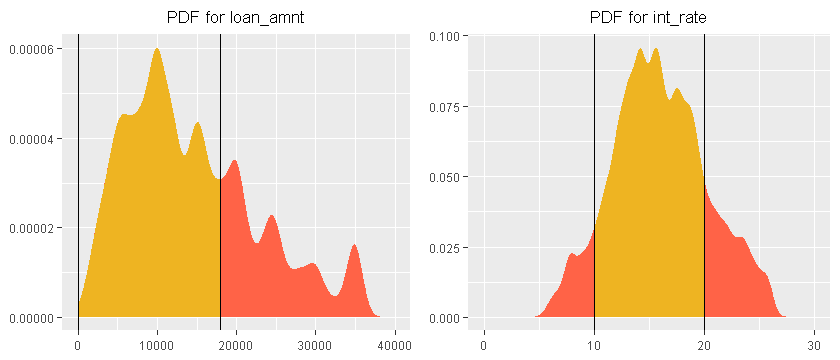

In [19]:
d.loan_amnt = density(data$loan_amnt[class=="bad"], kernel="gaussian", bw=1000, from=0, to=40000)
d.int_rate  = density(data$int_rate[class=="bad"],  kernel="gaussian", bw=0.5,  from=0, to=30)

pdf.loan_amnt = approxfun(d.loan_amnt)
pdf.int_rate = approxfun(d.int_rate)

data.frame(variable=c("loan_amnt","int_rate"),
           probability=c(integrate(pdf.loan_amnt, 0, 18000)$value, integrate(pdf.int_rate, 10, 20)$value),
           range_low=c(0, 10),
           range_high=c(18000, 20))

p1 = ggplot(data[class=="bad",]) + xlim(0, 40000) + ggtitle("PDF for loan_amnt") +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.loan_amnt, geom="area", n=2000, xlim=c(0,18000), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=18000) +
     theme.no_axis_titles

p2 = ggplot(data[class=="bad",]) + xlim(0, 30) + ggtitle("PDF for int_rate") +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.int_rate, geom="area", n=2000, xlim=c(10,20), fill=PALETTE[5]) +
     geom_vline(xintercept=10) + geom_vline(xintercept=20) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

### 2D Scatter Plot of 2 Variables + Loan Class

Note that distinguishing characteristics are obscured.

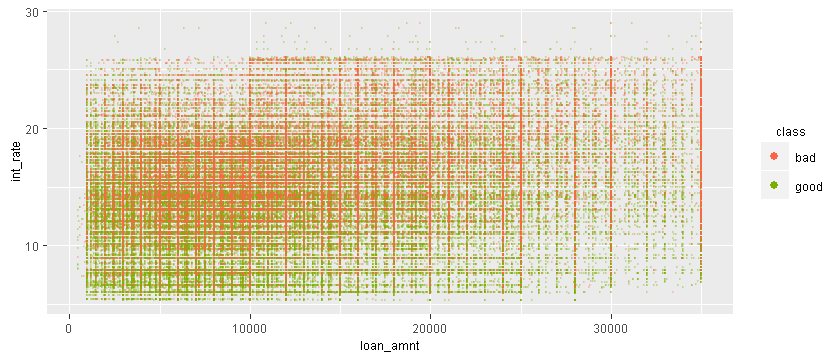

In [20]:
ggplot(data) +
geom_point(aes(x=loan_amnt, y=int_rate, color=class), alpha=0.2) +
scale_color_manual(values=PALETTE[2:3]) + guides.standard + theme.legend_title

## Further Prepare Data: Principal Component Analysis

### Data Represented as Principal Components

In [21]:
pc = prcomp(data, scale=TRUE, retx=TRUE)
data.pc = as.data.frame(pc$x)

size(data.pc)
fmt(data.pc[1:6,], "First few observations ...", position="left")

observations,variables
256939,17


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
-2.6728263,-0.1465467,0.0450934,0.8419750,0.8696164,-0.3897855,-0.5294172,0.7748944,0.4203098,-0.0536682,-0.0249489,-0.0257247,0.0059798,0.0023199,0.0012540,-0.0000036,-0.0000001
-3.4690408,-0.1686156,-0.0128454,-0.0778179,-0.7831999,0.5919857,0.6007657,-0.5759597,0.1728710,0.0679205,-0.0906673,-0.0424623,0.0172338,0.0015672,0.0006855,0.0000004,-0.0000003
-0.9233908,0.3227803,-0.1853512,0.6327526,-1.8526851,-2.1063312,-0.8736050,0.3179850,0.3868079,0.1452196,-0.3080882,-0.0586827,0.0314312,-0.0011145,0.0019065,-0.0000014,-0.0000002
-2.8601307,-0.5530504,0.1121233,-0.9970486,0.0589515,-0.2607079,0.2205148,0.4953472,0.2642117,-0.1202111,0.0950570,-0.0187472,0.0277040,0.0038231,0.0011372,-0.0000006,0.0000002
-3.1631177,-0.0416238,-0.0576907,0.0428298,-1.0869344,0.7352626,1.1560934,-0.9323186,0.1285576,0.2022035,-0.2282229,-0.0714973,0.0190179,0.0015922,0.0008001,0.0000009,-0.0000003
-2.2223630,-0.1828012,0.0160060,0.2814129,-0.3269076,0.3858523,0.0359717,0.0186176,0.2733875,0.0445881,-0.1191158,-0.2463197,-0.0109397,0.0094793,0.0034006,-0.0000021,0.0000000


### Qualitative Interpretation of Principal Components.

Here, each column lists variable names sorted by weight applied to the principal component.

In [22]:
pc_constituents(pc)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
funded_amnt,recoveries,out_prncp,dti,total_rec_late_fee,total_rec_late_fee,revol_bal,last_pymnt_amnt,total_rec_int,recoveries,total_rec_int,installment,funded_amnt_inv,loan_amnt,funded_amnt,out_prncp_inv,total_pymnt
loan_amnt,collection_recovery_fee,out_prncp_inv,int_rate,revol_bal,revol_bal,dti,int_rate,collection_recovery_fee,collection_recovery_fee,last_pymnt_amnt,funded_amnt_inv,total_pymnt_inv,funded_amnt,total_pymnt_inv,out_prncp,total_rec_prncp
funded_amnt_inv,out_prncp,recoveries,collection_recovery_fee,dti,int_rate,last_pymnt_amnt,total_rec_int,installment,last_pymnt_amnt,recoveries,loan_amnt,loan_amnt,total_pymnt_inv,funded_amnt_inv,funded_amnt,total_rec_int
total_pymnt,out_prncp_inv,collection_recovery_fee,total_rec_int,int_rate,dti,total_rec_int,dti,total_pymnt,total_rec_int,total_rec_prncp,funded_amnt,funded_amnt,funded_amnt_inv,total_rec_prncp,total_pymnt_inv,recoveries
total_pymnt_inv,int_rate,int_rate,recoveries,total_rec_int,last_pymnt_amnt,total_rec_late_fee,revol_bal,funded_amnt,installment,collection_recovery_fee,last_pymnt_amnt,total_rec_prncp,total_rec_prncp,total_pymnt,funded_amnt_inv,total_rec_late_fee
installment,total_rec_prncp,total_rec_late_fee,revol_bal,collection_recovery_fee,total_rec_int,int_rate,total_rec_late_fee,funded_amnt_inv,int_rate,total_pymnt_inv,total_rec_int,total_pymnt,total_pymnt,loan_amnt,total_rec_prncp,funded_amnt
total_rec_prncp,last_pymnt_amnt,last_pymnt_amnt,total_rec_prncp,last_pymnt_amnt,recoveries,collection_recovery_fee,collection_recovery_fee,total_pymnt_inv,total_rec_prncp,total_pymnt,total_pymnt_inv,installment,total_rec_int,total_rec_int,total_pymnt,loan_amnt
total_rec_int,total_rec_late_fee,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,total_rec_prncp,installment,loan_amnt,total_pymnt,int_rate,total_rec_prncp,total_rec_int,installment,recoveries,total_rec_int,out_prncp_inv
last_pymnt_amnt,total_rec_int,total_rec_int,out_prncp_inv,total_pymnt,installment,recoveries,loan_amnt,total_rec_prncp,total_pymnt_inv,loan_amnt,int_rate,recoveries,recoveries,installment,installment,out_prncp
revol_bal,total_pymnt_inv,total_pymnt_inv,out_prncp,total_pymnt_inv,total_pymnt_inv,total_pymnt_inv,funded_amnt,last_pymnt_amnt,dti,funded_amnt,recoveries,last_pymnt_amnt,last_pymnt_amnt,last_pymnt_amnt,loan_amnt,total_pymnt_inv


### Scree Plot of Principal Components

In [23]:
variable = names(data.pc)
sdev = var_info.sd(data.pc, labels=FALSE)
variance = var_info.var(data.pc, labels=FALSE)
cum_variance = cumsum(variance)
relative_variance = variance / sum(variance)
cum_relative_variance = cumsum(relative_variance)

scree.pc = data.frame(variable, sdev, variance, cum_variance, relative_variance, cum_relative_variance)
scree.pc

variable,sdev,variance,cum_variance,relative_variance,cum_relative_variance
PC1,2.7173098262308,7.38377269173050354567,7.383773,4.343396e-01,0.4343396
PC2,1.4721417710771,2.16720139414998724803,9.550974,1.274824e-01,0.5618220
PC3,1.4095611181014,1.98686254566316522485,11.537837,1.168743e-01,0.6786963
PC4,1.0740640204197,1.15361351996019578792,12.691450,6.785962e-02,0.7465559
PC5,1.0252282001400,1.05109286236220822452,13.742543,6.182899e-02,0.8083849
PC6,0.9839736782539,0.96820419949641245427,14.710747,5.695319e-02,0.8653381
PC7,0.8726487333024,0.76151581173426796667,15.472263,4.479505e-02,0.9101331
PC8,0.8007443563781,0.64119152427136827388,16.113455,3.771715e-02,0.9478503
PC9,0.6959904525408,0.48440271002792323340,16.597857,2.849428e-02,0.9763445
PC10,0.4282900978415,0.18343240790906042981,16.781290,1.079014e-02,0.9871347


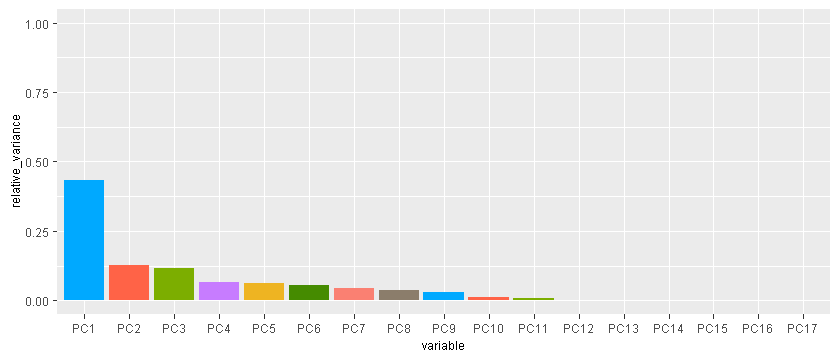

In [24]:
ggplot(scree.pc) + ylim(0,1) + xlab("variable") +
geom_col(aes(x=factor(variable, levels=variable), y=relative_variance, fill=variable)) +
theme.no_legend

## Try to Distiguish Transformed Observations by Loan Class

### Probabilities of Principal Component Values in Certain Ranges: Good Loans

variable,probability,range_low,range_high
PC1,0.6844254,-5,1
PC2,0.8486356,-2,0


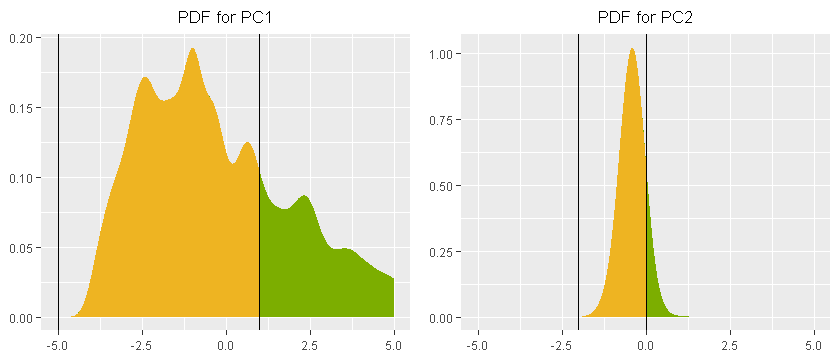

In [25]:
d.PC1 = density(data.pc$PC1[class=="good"], kernel="gaussian", bw=0.2, from=-5, to=5)
d.PC2 = density(data.pc$PC2[class=="good"], kernel="gaussian", bw=0.2, from=-5, to=5)

pdf.PC1 = approxfun(d.PC1)
pdf.PC2 = approxfun(d.PC2)

data.frame(variable=c("PC1","PC2"),
           probability=c(integrate(pdf.PC1, -5, 1)$value, integrate(pdf.PC2, -2, 0)$value),
           range_low=c(-5, -2),
           range_high=c(1, 0))


p1 = ggplot(data.pc[class=="good",]) + xlim(-5, 5) + ggtitle("PDF for PC1") +
     stat_function(fun=pdf.PC1, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.PC1, geom="area", n=2000, xlim=c(-5,1), fill=PALETTE[5]) +
     geom_vline(xintercept=-5) + geom_vline(xintercept=1) +
     theme.no_axis_titles

p2 = ggplot(data.pc[class=="good",]) + xlim(-5, 5) + ggtitle("PDF for PC2") +
     stat_function(fun=pdf.PC2, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.PC2, geom="area", n=2000, xlim=c(-2,0), fill=PALETTE[5]) +
     geom_vline(xintercept=-2) + geom_vline(xintercept=0) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

variable,probability,range_low,range_high
PC1,0.5677632,-5,0
PC2,0.1519486,0,2


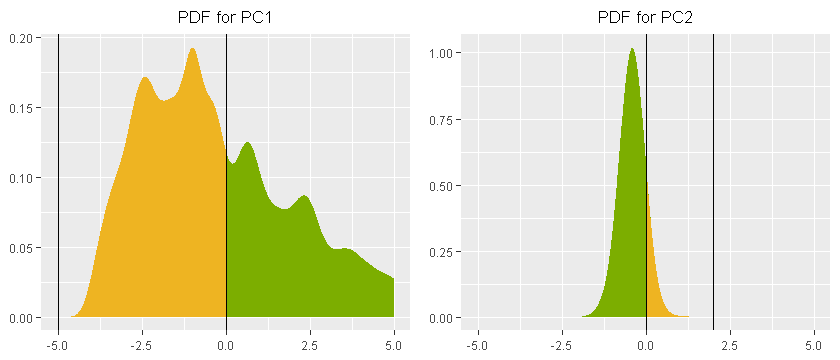

In [26]:
d.PC1 = density(data.pc$PC1[class=="good"], kernel="gaussian", bw=0.2, from=-5, to=5)
d.PC2 = density(data.pc$PC2[class=="good"], kernel="gaussian", bw=0.2, from=-5, to=5)

pdf.PC1 = approxfun(d.PC1)
pdf.PC2 = approxfun(d.PC2)

data.frame(variable=c("PC1","PC2"),
           probability=c(integrate(pdf.PC1, -5, 0)$value, integrate(pdf.PC2, 0, 2)$value),
           range_low=c(-5, 0),
           range_high=c(0, 2))

p1 = ggplot(data.pc[class=="good",]) + xlim(-5, 5) + ggtitle("PDF for PC1") +
     stat_function(fun=pdf.PC1, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.PC1, geom="area", n=2000, xlim=c(-5,0), fill=PALETTE[5]) +
     geom_vline(xintercept=-5) + geom_vline(xintercept=0) +
     theme.no_axis_titles

p2 = ggplot(data.pc[class=="good",]) + xlim(-5, 5) + ggtitle("PDF for PC2") +
     stat_function(fun=pdf.PC2, geom="area", n=2000, fill=PALETTE[3]) +
     stat_function(fun=pdf.PC2, geom="area", n=2000, xlim=c(0,2), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=2) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

### Probabilities of Principal Component Values in Certain Ranges: Bad Loans

variable,probability,range_low,range_high
PC1,0.81221398,-5,1
PC2,0.09706742,-2,0


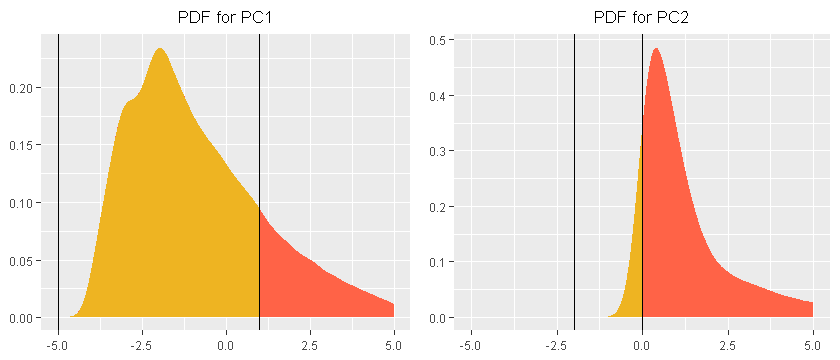

In [27]:
d.PC1 = density(data.pc$PC1[class=="bad"], kernel="gaussian", bw=0.2, from=-5, to=5)
d.PC2 = density(data.pc$PC2[class=="bad"], kernel="gaussian", bw=0.2, from=-5, to=5)

pdf.PC1 = approxfun(d.PC1)
pdf.PC2 = approxfun(d.PC2)

data.frame(variable=c("PC1","PC2"),
           probability=c(integrate(pdf.PC1, -5, 1)$value, integrate(pdf.PC2, -2, 0)$value),
           range_low=c(-5, -2),
           range_high=c(1, 0))

p1 = ggplot(data.pc[class=="bad",]) + xlim(-5, 5) + ggtitle("PDF for PC1") +
     stat_function(fun=pdf.PC1, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.PC1, geom="area", n=2000, xlim=c(-5,1), fill=PALETTE[5]) +
     geom_vline(xintercept=-5) + geom_vline(xintercept=1) +
     theme.no_axis_titles

p2 = ggplot(data.pc[class=="bad",]) + xlim(-5, 5) + ggtitle("PDF for PC2") +
     stat_function(fun=pdf.PC2, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.PC2, geom="area", n=2000, xlim=c(-2,0), fill=PALETTE[5]) +
     geom_vline(xintercept=-2) + geom_vline(xintercept=0) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

variable,probability,range_low,range_high
PC1,0.6979371,-5,0
PC2,0.6455254,0,2


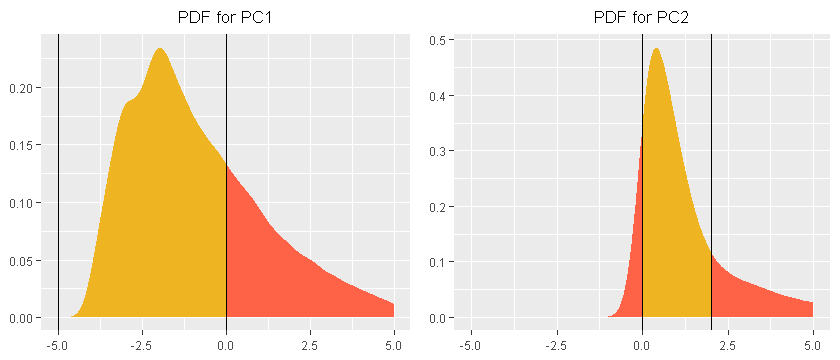

In [28]:
d.PC1 = density(data.pc$PC1[class=="bad"], kernel="gaussian", bw=0.2, from=-5, to=5)
d.PC2 = density(data.pc$PC2[class=="bad"], kernel="gaussian", bw=0.2, from=-5, to=5)

pdf.PC1 = approxfun(d.PC1)
pdf.PC2 = approxfun(d.PC2)

data.frame(variable=c("PC1","PC2"),
           probability=c(integrate(pdf.PC1, -5, 0)$value, integrate(pdf.PC2, 0, 2)$value),
           range_low=c(-5, 0),
           range_high=c(0, 2))

p1 = ggplot(data.pc[class=="bad",]) + xlim(-5, 5) + ggtitle("PDF for PC1") +
     stat_function(fun=pdf.PC1, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.PC1, geom="area", n=2000, xlim=c(-5,0), fill=PALETTE[5]) +
     geom_vline(xintercept=-5) + geom_vline(xintercept=0) +
     theme.no_axis_titles

p2 = ggplot(data.pc[class=="bad",]) + xlim(-5, 5) + ggtitle("PDF for PC2") +
     stat_function(fun=pdf.PC2, geom="area", n=2000, fill=PALETTE[2]) +
     stat_function(fun=pdf.PC2, geom="area", n=2000, xlim=c(0,2), fill=PALETTE[5]) +
     geom_vline(xintercept=0) + geom_vline(xintercept=2) +
     theme.no_axis_titles

grid.arrange(p1, p2, nrow=1)

### 2D Scatter Plot of 2 Principal Components + Loan Class

Note that distinguishing characteristics are revealed.

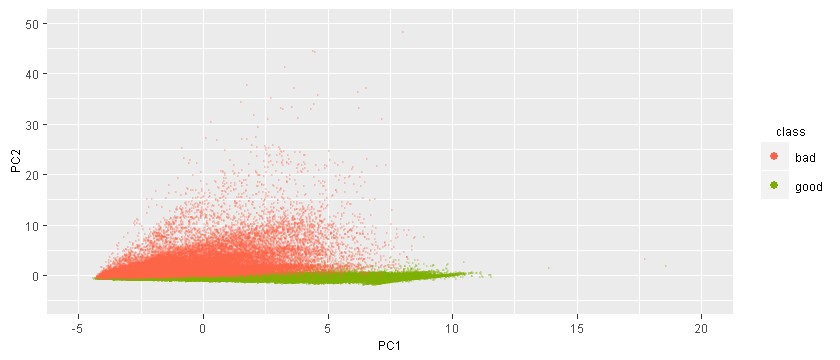

In [29]:
ggplot(data.pc) + xlim(-5,20) + ylim(-5,50) +
geom_point(aes(x=PC1, y=PC2, color=class), alpha=0.2, na.rm=TRUE) +
scale_color_manual(values=PALETTE[2:3]) + guides.standard + theme.legend_title

## Predictive Model

Here is one of infinitely many predictive models.

### Homogeneous Spaces

#### Convex Hulls Around Observations by Loan Class

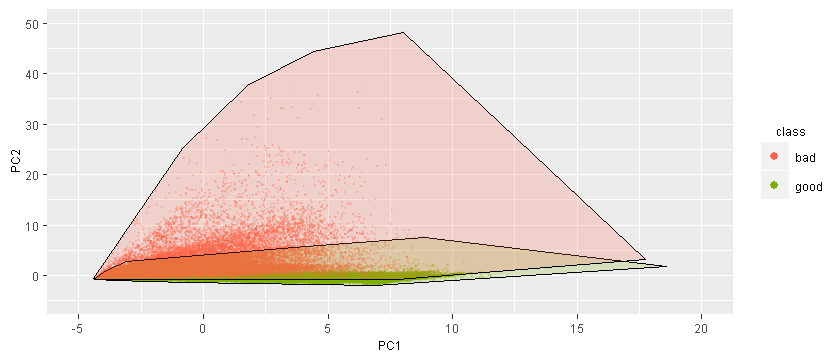

In [30]:
convex_hull.good = data.pc[class=="good", c("PC1","PC2")][chull(data.pc$PC1[class=="good"], data.pc$PC2[class=="good"]),]
convex_hull.bad  = data.pc[class=="bad",  c("PC1","PC2")][chull(data.pc$PC1[class=="bad"],  data.pc$PC2[class=="bad"]),]

ggplot(data.pc) + xlim(-5,20) + ylim(-5,50) +
geom_point(aes(x=PC1, y=PC2, color=class), alpha=0.2) +
geom_polygon(aes(x=PC1, y=PC2), data=convex_hull.good, fill=PALETTE[3], color="black", alpha=0.2) +
geom_polygon(aes(x=PC1, y=PC2), data=convex_hull.bad,  fill=PALETTE[2], color="black", alpha=0.2) +
scale_color_manual(values=PALETTE[2:3]) + guides.standard + theme.legend_title

#### Homogeneous Spaces by Loan Class

A predictive model with high certainty ...

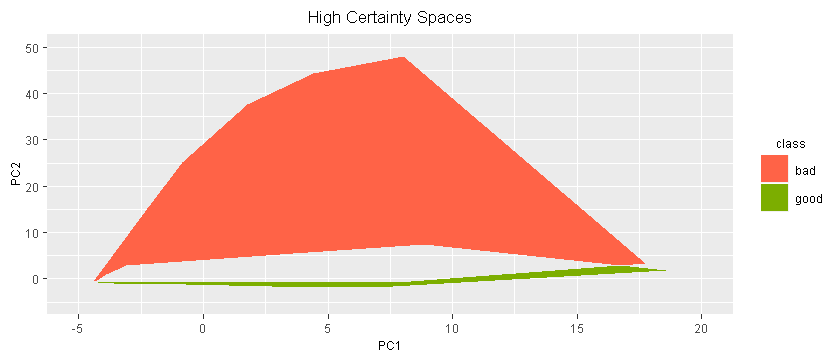

In [31]:
A = list(x=convex_hull.good$PC1, y=convex_hull.good$PC2)
B = list(x=convex_hull.bad$PC1,  y=convex_hull.bad$PC2)
X = polyclip(A, B, op="minus")
space.high.good = as.data.frame(X[[1]]); names(space.high.good) = c("PC1","PC2")
X = polyclip(B, A, op="minus")
space.high.bad = as.data.frame(X[[1]]); names(space.high.bad) = c("PC1","PC2")

ggplot() + ggtitle("High Certainty Spaces") + xlim(-5,20) + ylim(-5,50) +
geom_polygon(aes(x=PC1, y=PC2, fill="good"), data=space.high.good) +
geom_polygon(aes(x=PC1, y=PC2, fill="bad"),  data=space.high.bad) +
scale_fill_manual("class", values=c("good"=PALETTE[3], "bad"=PALETTE[2])) + theme.legend_title

### Non-Homogeneous Space

A predictive model with medium certainty ...

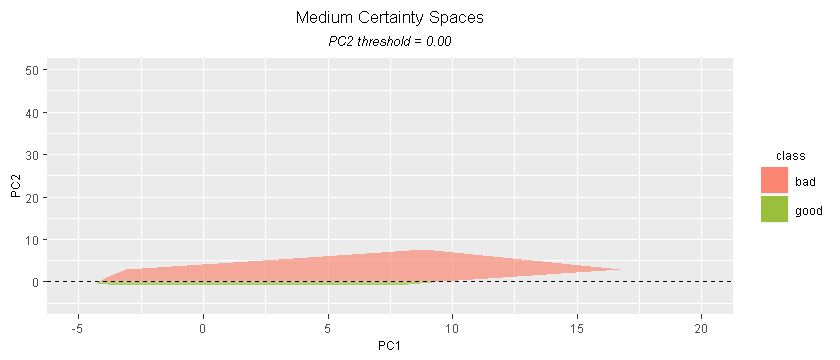

In [32]:
A = list(x=convex_hull.good$PC1, y=convex_hull.good$PC2)
B = list(x=convex_hull.bad$PC1,  y=convex_hull.bad$PC2)
X = polyclip(A, B, op="intersection")
space.medium = as.data.frame(X[[1]]); names(space.medium) = c("PC1","PC2")

A = list(x=space.medium$PC1, y=space.medium$PC2)
B = list(x=c(-5,-5,20,20), y=c(0,-5,-5,0))
X = polyclip(A, B, op="intersection")
space.medium.good = as.data.frame(X[[1]]); names(space.medium.good) = c("PC1","PC2")

A = list(x=space.medium$PC1, y=space.medium$PC2)
B = list(x=c(-5,-5,20,20), y=c(0,50,50,0))
X = polyclip(A, B, op="intersection")
space.medium.bad = as.data.frame(X[[1]]); names(space.medium.bad) = c("PC1","PC2")

ggplot() + ggtitle("Medium Certainty Spaces", "PC2 threshold = 0.00") + xlim(-5,20) + ylim(-5,50) +
geom_polygon(aes(x=PC1, y=PC2, fill="good"), data=space.medium.good, alpha=0.5) +
geom_polygon(aes(x=PC1, y=PC2, fill="bad"),  data=space.medium.bad,  alpha=0.5) +
geom_hline(yintercept=0, linetype="dashed") +
scale_fill_manual("class", values=PALETTE[2:3]) + guides.standard + theme.legend_title

### Model Form & Parameterization

A predictive model with high and medium certainties ...

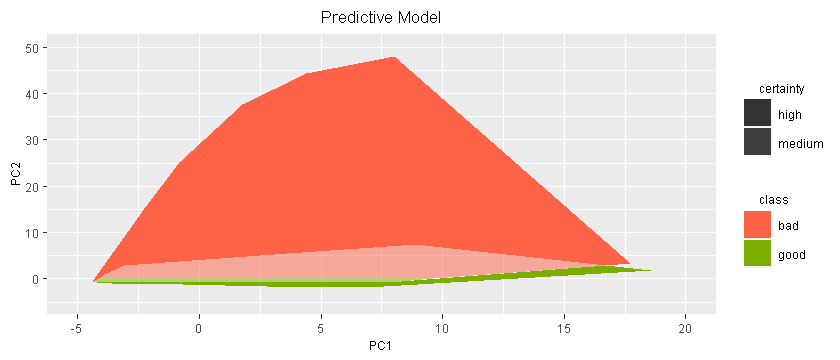

In [33]:
ggplot() + ggtitle("Predictive Model") + xlim(-5,20) + ylim(-5,50) +
geom_polygon(aes(x=PC1, y=PC2, fill="good", alpha="medium"), data=space.medium.good) +
geom_polygon(aes(x=PC1, y=PC2, fill="bad", alpha="medium"), data=space.medium.bad) +
geom_polygon(aes(x=PC1, y=PC2, fill="good", alpha="high"), data=space.high.good) +
geom_polygon(aes(x=PC1, y=PC2, fill="bad", alpha="high"), data=space.high.bad) +
scale_fill_manual("class", values=c("good"=PALETTE[3], "bad"=PALETTE[2])) +
scale_alpha_manual("certainty", values=c("medium"=0.5, "high"=1)) + 
theme.legend_title

#### Hyper-Parameters

You pick the hyper-parameter value(s).  This model's parameters were determined by form and 1 hyper-parameter:
1. PC2 threshold for medium non-homogeneous space

In [34]:
fmt(0.00, "PC2 threshold")

PC2 threshold
0


#### Parameters

This model is defined by these parameters:
1. Polygon vertices for high certainty good loans
1. Polygon vertices for high certainty bad loans

Note that polygon vertices for medium certainty good loans are implied by hyper-parameter value and parameter values.<br/>
Note that polygon vertices for medium certainty bad loans are implied by hyper-parameter value and parameter values.

In [35]:
fmt(data.frame(t(space.high.good)), "If new observation is within this space, then predict it's a good loan with high certainty:", row.names=TRUE, position="left")

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
PC1,6.899866,18.586382,16.715751,7.7807580,-2.6168771,-3.822216,-4.2185936,-4.3480485,-4.3566855,-4.2202007,-4.1992759,-3.5756162,-0.6746178,4.469709,6.829755
PC2,-1.926050,1.750368,2.860872,-0.7392996,-0.7838926,-0.728736,-0.7044975,-0.6523005,-0.7143197,-0.8148443,-0.8198754,-0.9286186,-1.2927344,-1.828825,-1.933555


In [36]:
fmt(data.frame(t(space.high.bad)), "If new observation is within this space, then predict it's a bad loan with high certainty:", position="left", row.names=TRUE)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
PC1,-4.3473015,-4.0007488,-3.892890,-3.088704,3.622604,8.874498,16.715751,17.727861,8.014715,4.398551,1.781564,-0.8352832,-2.25130,-4.4103049,-4.3480485
PC2,-0.6469363,0.5945983,0.929579,2.797726,5.477395,7.515850,2.860872,3.268681,48.066636,44.386622,37.548973,25.1209963,15.15825,-0.6271984,-0.6523005


In [37]:
fmt(data.frame(t(space.medium.good)), "If new observation is within this space, then predict it's a good loan with moderate certainty:", position="left", row.names=TRUE)

,X1,X2,X3,X4,X5,X6,X7,X8
PC1,7.7807580,9.61557,-4.166721,-4.3473015,-4.3480485,-4.2185936,-3.822216,-2.6168771
PC2,-0.7392996,0.00000,0.000000,-0.6469363,-0.6523005,-0.7044975,-0.728736,-0.7838926


In [38]:
fmt(data.frame(t(space.medium.bad)), "If new observation is within this space, then predict it's a bad loan with high certainty:", position="left", row.names=TRUE)

,X1,X2,X3,X4,X5,X6,X7,X8
PC1,16.715751,8.874498,3.622604,-3.088704,-3.892890,-4.0007488,-4.166721,9.61557
PC2,2.860872,7.515850,5.477395,2.797727,0.929579,0.5945983,0.000000,0.00000


## Prediction

Some new observations ...

In [39]:
new = datax[c(3000, 6000, 5014, 5017),]
fmt(new, title=NA)

id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1028052,1257431,16800,16800,16800,36 months,6.03,511.32,A,A1,BNY Mellon,5 years,MORTGAGE,75000,Not Verified,Nov-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1028052,,debt_consolidation,Personal,027xx,MA,12.50,0,Nov-1997,1,NA,NA,10,0,13325,20.2,22,f,0.00,0.00,17982.38,17982.38,16800.00,1182.38,0,0,0,Jun-2013,9292.76,,Jun-2013,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
976629,1199392,19075,19075,19075,60 months,13.49,438.82,C,C1,San Bernardino County Superior Court,10+ years,MORTGAGE,82776,Verified,Oct-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=976629,,debt_consolidation,Enough is Enough,917xx,CA,14.08,0,Nov-1990,1,47,NA,11,0,41170,50.0,48,f,0.00,0.00,23747.61,23747.61,19075.00,4672.61,0,0,0,Jan-2014,12788.74,,Jan-2016,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
993747,1218133,9100,9100,9100,36 months,12.42,304.08,B,B4,Bellhelicopter,6 years,MORTGAGE,66000,Source Verified,Oct-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=993747,,other,Other Loan,761xx,TX,18.51,0,Mar-2000,1,NA,92,11,1,9947,34.1,25,f,0.00,0.00,10946.31,10946.31,9100.00,1846.31,0,0,0,Nov-2014,306.75,,Jan-2016,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
867871,1081504,21000,21000,21000,60 months,14.65,495.74,C,C3,Christus St.Francis Cabrini Hospital,5 years,MORTGAGE,72000,Source Verified,Oct-2011,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=867871,Borrower added on 10/25/11 > Outdoor Kitchen and Patio with Fireplace<br/>,home_improvement,Backyard Addition,713xx,LA,22.98,0,Aug-1999,1,NA,NA,9,0,7476,64.4,27,f,4641.44,4641.44,24784.57,24784.57,16358.56,8426.01,0,0,0,Jan-2016,495.74,Jan-2016,Jan-2016,0,NA,1,INDIVIDUAL,NA,NA,,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Represent the new observations as principal components ...

In [40]:
new.pc = as.data.frame(predict(pc, new))
fmt(new.pc, title=NA)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0.939510,-0.9517519,0.2478433,-1.5846141,0.4814426,-0.4668083,-0.4343095,0.5425070,-0.0718848,-0.0758574,0.0629571,-0.0125530,0.0206848,0.0033950,0.0007629,0.0000005,0.0000000
2.533915,-0.5280182,0.1288180,0.0405290,0.2564283,-0.3348072,0.9617236,-0.1806087,0.8802431,-0.4340605,0.3831211,-0.3200990,-0.0020988,0.0195083,0.0065554,-0.0000046,0.0000000
-1.288913,-0.1838009,0.0295805,0.1911345,-0.0036448,0.0081050,0.0726286,0.6637054,0.2647919,0.1275329,-0.1933606,-0.0367259,0.0175672,0.0012574,0.0020289,-0.0000017,0.0000002
2.727733,3.5232720,5.9354508,0.4987758,-0.8589747,0.5706727,0.4026023,2.0772339,1.6221660,-0.4264108,0.2956805,-0.3406679,-0.0089201,0.0198996,0.0118017,-0.0009636,0.0000000


Visualize observations and model ...

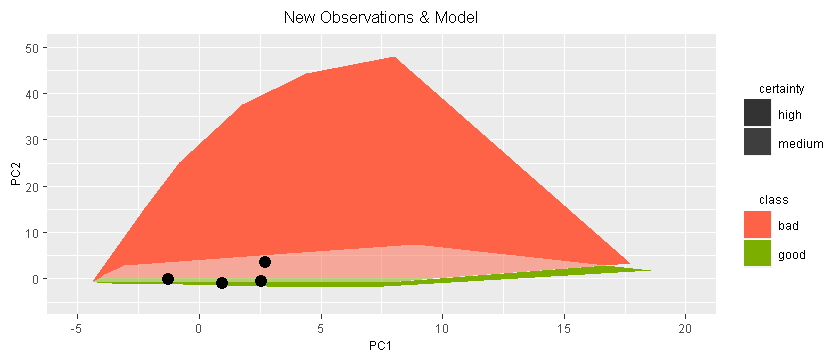

In [41]:
ggplot() + ggtitle("New Observations & Model")+ xlim(-5,20) + ylim(-5,50) +
geom_polygon(aes(x=PC1, y=PC2, fill="good", alpha="medium"), data=space.medium.good) +
geom_polygon(aes(x=PC1, y=PC2, fill="bad", alpha="medium"), data=space.medium.bad) +
geom_polygon(aes(x=PC1, y=PC2, fill="good", alpha="high"), data=space.high.good) +
geom_polygon(aes(x=PC1, y=PC2, fill="bad", alpha="high"), data=space.high.bad) +
geom_point(aes(x=PC1, y=PC2), data=new.pc, size=3, color="black") +
scale_fill_manual("class", values=c("good"=PALETTE[3], "bad"=PALETTE[2])) +
scale_alpha_manual("certainty", values=c("medium"=0.5, "high"=1)) + 
theme.legend_title

Make predictions ...

In [42]:
prediction = data.frame(PC1=new.pc$PC1, PC2=new.pc$PC2,
                        high_good=inside(new.pc[,c("PC1","PC2")],   space.high.good),
                        high_bad=inside(new.pc[,c("PC1","PC2")],    space.high.bad),
                        medium_good=inside(new.pc[,c("PC1","PC2")], space.medium.good),
                        medium_bad=inside(new.pc[,c("PC1","PC2")],  space.medium.bad))

prediction$commit = factor(aaply(1:nrow(prediction), 1, function(i) which(as.logical(prediction[i,3:6]))),
                           levels=1:4,
                           labels=names(prediction)[3:6])

fmt(prediction)

PC1,PC2,high_good,high_bad,medium_good,medium_bad,commit
0.939510,-0.9517519,TRUE,FALSE,FALSE,FALSE,high_good
2.533915,-0.5280182,FALSE,FALSE,TRUE,FALSE,medium_good
-1.288913,-0.1838009,FALSE,FALSE,TRUE,FALSE,medium_good
2.727733,3.5232720,FALSE,FALSE,FALSE,TRUE,medium_bad


Visualize observations, model, & predictions ...

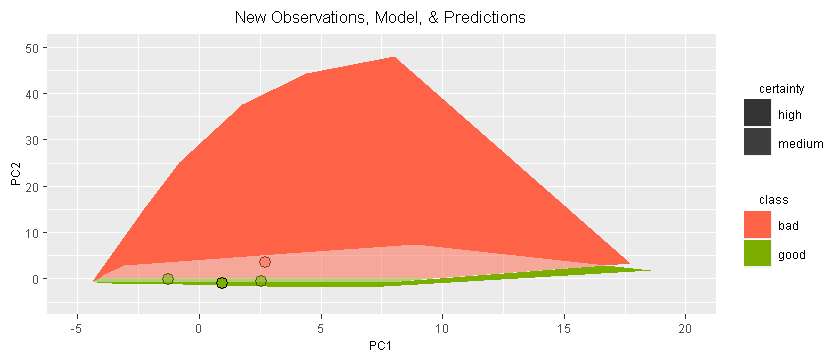

In [43]:
ggplot() + ggtitle("New Observations, Model, & Predictions") + xlim(-5,20) + ylim(-5,50) +
geom_polygon(aes(x=PC1, y=PC2, fill="good", alpha="medium"), data=space.medium.good) +
geom_polygon(aes(x=PC1, y=PC2, fill="bad", alpha="medium"), data=space.medium.bad) +
geom_polygon(aes(x=PC1, y=PC2, fill="good", alpha="high"), data=space.high.good) +
geom_polygon(aes(x=PC1, y=PC2, fill="bad", alpha="high"), data=space.high.bad) +
geom_point(aes(x=PC1, y=PC2), data=new.pc[1,], size=3, fill=PALETTE[3], color="black", alpha=1.0, shape=21) +
geom_point(aes(x=PC1, y=PC2), data=new.pc[2,], size=3, fill=PALETTE[3], color="black", alpha=0.5, shape=21) +
geom_point(aes(x=PC1, y=PC2), data=new.pc[3,], size=3, fill=PALETTE[3], color="black", alpha=0.5, shape=21) +
geom_point(aes(x=PC1, y=PC2), data=new.pc[4,], size=3, fill=PALETTE[2], color="black", alpha=0.5, shape=21) +
scale_fill_manual("class", values=c("good"=PALETTE[3], "bad"=PALETTE[2])) +
scale_alpha_manual("certainty", values=c("medium"=0.5, "high"=1)) + 
theme.legend_title

## Evaluation

### Evaluate Model's Performance on New Observations

In [44]:
evaluation = prediction
evaluation$actual = class[c(3000, 6000, 5014, 5017)]
evaluation

PC1,PC2,high_good,high_bad,medium_good,medium_bad,commit,actual
0.939510,-0.9517519,TRUE,FALSE,FALSE,FALSE,high_good,good
2.533915,-0.5280182,FALSE,FALSE,TRUE,FALSE,medium_good,good
-1.288913,-0.1838009,FALSE,FALSE,TRUE,FALSE,medium_good,good
2.727733,3.5232720,FALSE,FALSE,FALSE,TRUE,medium_bad,good


### Evaluate Model's Perfromance on All Data

In [45]:
data.pc.high.good = data.pc[inside(data.pc[,c("PC1","PC2")], space.high.good),]
class.high.good   = class[inside(data.pc[,c("PC1","PC2")], space.high.good)]

data.pc.high.bad = data.pc[inside(data.pc[,c("PC1","PC2")], space.high.bad), ]
class.high.bad   = class[inside(data.pc[,c("PC1","PC2")], space.high.bad)]

data.pc.medium.good = data.pc[inside(data.pc[,c("PC1","PC2")], space.medium.good),]
class.medium.good   = class[inside(data.pc[,c("PC1","PC2")], space.medium.good)]

data.pc.medium.bad = data.pc[inside(data.pc[,c("PC1","PC2")], space.medium.bad),]
class.medium.bad   = class[inside(data.pc[,c("PC1","PC2")], space.medium.bad)]

d = data.frame(high.good=100,
               medium.good=100*table(class.medium.good)["good"] / length(class.medium.good),
               high.bad=100,
               medium.bad=100*table(class.medium.bad)["bad"] / length(class.medium.bad))

fmt(d, "Correct predictions (%)")

high.good,medium.good,high.bad,medium.bad
100,97.57178,100,61.47775


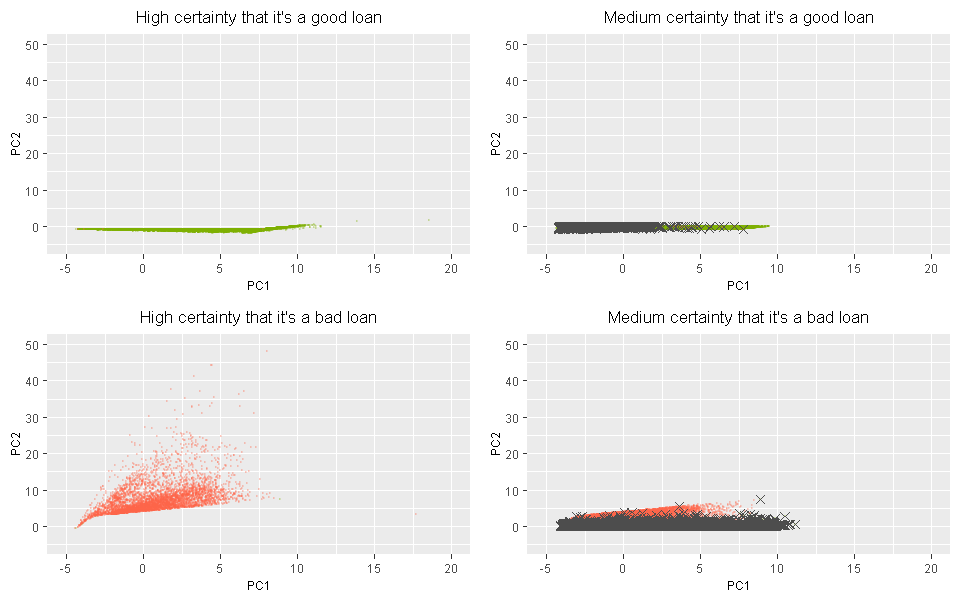

In [46]:
output_size(8,5)

p1 = ggplot(data.pc.high.good) + xlim(-5,20) + ylim(-5,50) +
     geom_point(aes(x=PC1, y=PC2, color=class.high.good), alpha=0.2) +
     scale_color_manual(values=PALETTE[2:3]) + theme.no_legend +
     ggtitle("High certainty that it's a good loan")

p2 = ggplot(data.pc.medium.good) + xlim(-5,20) + ylim(-5,50) +
     geom_point(aes(x=PC1, y=PC2, color=class.medium.good), alpha=0.2) +
     geom_point(aes(x=PC1, y=PC2), data=data.pc.medium.good[class.medium.good=="bad",], color="gray30", size=2, shape=4) +
     scale_color_manual(values=PALETTE[2:3]) + theme.no_legend +
     ggtitle("Medium certainty that it's a good loan")

p3 = ggplot(data.pc.high.bad) + xlim(-5,20) + ylim(-5,50) +
     geom_point(aes(x=PC1, y=PC2, color=class.high.bad), alpha=0.2) +
     scale_color_manual(values=PALETTE[2:3]) + theme.no_legend +
     ggtitle("High certainty that it's a bad loan")

p4 = ggplot(data.pc.medium.bad) + xlim(-5,20) + ylim(-5,50) +
     geom_point(aes(x=PC1, y=PC2, color=class.medium.bad), alpha=0.2) +
     geom_point(aes(x=PC1, y=PC2), data=data.pc.medium.bad[class.medium.bad=="good",], color="gray30", size=2, shape=4) +
     scale_color_manual(values=PALETTE[2:3]) + theme.no_legend +
     ggtitle("Medium certainty that it's a bad loan")

grid.arrange(p1, p2, p3, p4, nrow=2, ncol=2)

output_size(restore)

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised March 1, 2020
</span>
</p>